In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn import preprocessing
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/ML Project/LES_RANS

/content/drive/My Drive/ML Project/LES_RANS


In [5]:
ls

'Copy of data_p_time_modelled.csv'    model_uz.h5
'Copy of data_ux_time_modelled.csv'   model_uz.json
'Copy of data_uy_time_modelled.csv'   Random_Forest_LES_RANS.ipynb
'Copy of data_uz_time_modelled.csv'   RANS_sampling_30.csv
 MLP_LES_RANS_p.ipynb                 rf_ux_1.sav
 MLP_LES_RANS_ux.ipynb                rf_ux_2.sav
 MLP_LES_RANS_uy.ipynb                rf_ux_3.sav
 MLP_LES_RANS_uz.ipynb                rf_ux_4.sav
 model.h5                             rf_ux_5.sav
 model.json                           rf_ux_single_1.sav
 model_p.h5                           rf_ux_single_2.sav
 model_p.json                         rf_ux_single_3.sav
 model_ux.h5                          rf_ux_single_4.sav
 model_ux.json                        rf_ux_single_5.sav
 model_uy.h5                          SVR_LES_RANS.ipynb
 model_uy.json


In [0]:
# Read Features
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID'], axis=1)

# Read dependent variable
Y=pd.read_csv('Copy of data_p_time_modelled.csv')
Y=Y.drop(['cellID'],axis=1)

In [0]:
# Normalizing
#X=preprocessing.scale(X)
#mean = np.mean(X)
#std = np.std(X)
#X =  (X - mean) / std
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle= True, test_size=0.3,random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, shuffle= True, random_state=42)
# Scalling
#train_mean = np.mean(X_train)
#train_std = np.std(X_train)
#X_train =  (X_train - train_mean) / train_std
#X_val =  (X_val - train_mean) / train_std
#X_test = (X_test - train_mean) / train_std

scaler = preprocessing.StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_val =scaler.transform(X_val)
X_test =scaler.transform(X_test)

input_dim = X_train.shape[1]
nb_y = y_train.shape[1]

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
#model.add(Dropout(0.15))
#Hidden Layer2
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.15))
#Hidden Layer3
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.15))
#Hidden Layer4
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.15))
#Output Layer
model.add(Dense(nb_y))

adam=keras.optimizers.Adam(lr=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
#Model
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
#Train
print("Training...")
history=model.fit(X_train, y_train, epochs=200, batch_size=30,validation_data=(X_val, y_val) , verbose=1) #validation_split=0.3

print("Generating test predictions...")

Training...
Train on 402567 samples, validate on 44730 samples
Epoch 1/200
402567/402567 [==============================] - 18s 45us/step - loss: 0.0798 - acc: 0.3742 - val_loss: 0.0510 - val_acc: 0.5347
Epoch 2/200
402567/402567 [==============================] - 18s 45us/step - loss: 0.0377 - acc: 0.5529 - val_loss: 0.0280 - val_acc: 0.5751
Epoch 3/200
402567/402567 [==============================] - 18s 44us/step - loss: 0.0251 - acc: 0.5769 - val_loss: 0.0224 - val_acc: 0.5811
Epoch 4/200
402567/402567 [==============================] - 18s 44us/step - loss: 0.0210 - acc: 0.5817 - val_loss: 0.0191 - val_acc: 0.5876
Epoch 5/200
402567/402567 [==============================] - 18s 43us/step - loss: 0.0181 - acc: 0.5888 - val_loss: 0.0166 - val_acc: 0.5923
Epoch 6/200
402567/402567 [==============================] - 18s 44us/step - loss: 0.0159 - acc: 0.5912 - val_loss: 0.0148 - val_acc: 0.5941
Epoch 7/200
402567/402567 [==============================] - 18s 44us/step - loss: 0.0144 -

191699/191699 [==============================] - 4s 20us/step
Test Accuracy: [0.0019487766166962342, 0.7718871761546392]


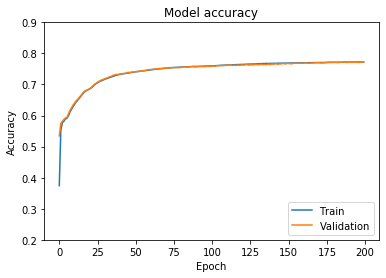

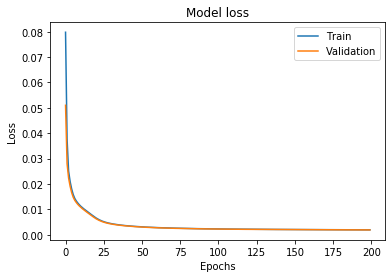

In [0]:
score = model.evaluate(X_test, y_test, batch_size=30)
print('Test Accuracy: {}'.format(score))
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.ylim(0.2,0.9)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model_p.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_p.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
# load json and create model
json_file = open('model_p.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_p.h5")
print("Loaded model from disk")










Loaded model from disk


In [9]:
# evaluate loaded model on test data
adam=keras.optimizers.Adam(lr=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID'], axis=1)
Y=pd.read_csv('Copy of data_p_time_modelled.csv')
Y=Y.drop(['cellID'],axis=1)
scaler_pred = preprocessing.StandardScaler().fit(X)
X_pred = scaler_pred.transform(X)
loaded_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
score = loaded_model.evaluate(X_pred, Y, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


638996/638996 [==============================] - 12s 18us/step
acc: 79.64%


In [0]:
#Predicting the series with selected Variable at t-1 and t-2 and coefficients from AR model
#Y_pred=np.asarray(loaded_model.predict(X_pred, verbose=1))
#Y_time_series=np.zeros((len(Y_pred),200))
#for j in range(len(Y_pred)):
#  for i in range(len(Y_time_series[0])):
#    if i == 0:
#      Y_time_series[j,i]=Y_Pred[j,0] + Y_Pred[j,1]*Y_Pred[j,2] + Y_Pred[j,3]*Y_Pred[j,4]
#    elif i==1:
#      Y_time_series[j,i]=Y_Pred[j,0] + Y_Pred[j,1]*Y_time_series[j,i-1] + Y_Pred[j,3]*Y_Pred[j,2]
#    else:
#      Y_time_series[j,i]=Y_Pred[j,0] + Y_Pred[j,1]*Y_time_series[j,i-1] + Y_Pred[j,3]*Y_time_series[j,i-2]

In [11]:
Y_pred=np.asarray(loaded_model.predict(X_pred, verbose=1))
Y_time_series=pd.DataFrame({'0':Y_pred[:,2],'1':Y_pred[:,4]})
for i in range(2,10):
  Y_time_series['{}'.format(i)]=Y_pred[:,0] + Y_pred[:,1]*Y_time_series['{}'.format(i-1)] + Y_pred[:,3]*Y_time_series['{}'.format(i-2)]

638996/638996 [==============================] - 8s 13us/step


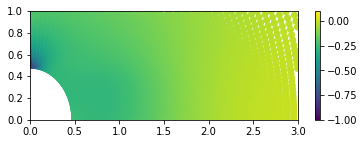

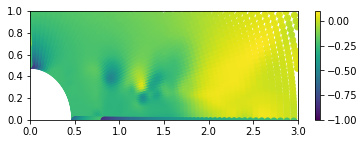

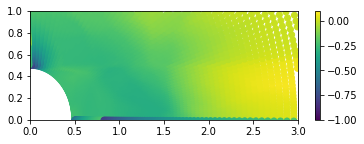

In [13]:
#Making 2d plot
#at some z position 
X=X[X['ccz']==0.693]
#Y_time_series

plt.rcParams["figure.figsize"] = [6,2]
plt.scatter(X['ccx'],X['ccy'],c=X['p'])
plt.colorbar()
plt.clim(-1, 0.1)
plt.xlim(0,3)
plt.ylim(0,1)
plt.show()
m,n=X.shape
#plt.scatter(X['ccx'],X['ccy'],c=Y['x1[n]'].iloc[:m])
#plt.colorbar()
#plt.clim(-1, 0.1)
#plt.xlim(0,3)
#plt.ylim(0,1)
#plt.show()
plt.scatter(X['ccx'],X['ccy'],c=Y['x1[n-1]'].iloc[:m])
plt.colorbar()
plt.clim(-1, 0.1)
plt.xlim(0,3)
plt.ylim(0,1)
plt.show()
plt.scatter(X['ccx'],X['ccy'],c=Y_time_series['0'].iloc[:m])
plt.colorbar()
plt.clim(-1, 0.1)
plt.xlim(0,3)
plt.ylim(0,1)
plt.show()
#plt.scatter(X['ccx'],X['ccy'],c=Y_time_series['1'].iloc[:m])
#plt.colorbar()
#plt.clim(-1, 0.1)
#plt.xlim(0,3)
#plt.ylim(0,1)
#plt.show()